# Setup

## Install detectron2

In [3]:
!python -m pip install pyyaml==5.1
import sys, os, distutils.core
# Note: This is a faster way to install detectron2 in Colab, but it does not include all functionalities (e.g. compiled operators).
# See https://detectron2.readthedocs.io/tutorials/install.html for full installation instructions
# !git clone 'https://github.com/facebookresearch/detectron2'
# dist = distutils.core.run_setup("./detectron2/setup.py")
# !python -m pip install {' '.join([f"'{x}'" for x in dist.install_requires])}
# sys.path.insert(0, os.path.abspath('./detectron2'))

# Properly install detectron2. (Please do not install twice in both ways)
!python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'

Defaulting to user installation because normal site-packages is not writeable
  Using cached PyYAML-5.1.tar.gz (274 kB)
  Created wheel for pyyaml: filename=PyYAML-5.1-cp38-cp38-linux_x86_64.whl size=44074 sha256=ebc53e6b4fa7d8f8fa573aaf9e8b7a9605107f03d4a45754dd5c587fd5c78489
  Stored in directory: /home/shabanza/.cache/pip/wheels/52/dd/2b/10ff8b0ac81b93946bb5fb9e6749bae2dac246506c8774e6cf
Successfully built pyyaml
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dask 2022.7.0 requires pyyaml>=5.3.1, but you have pyyaml 5.1 which is incompatible.
Defaulting to user installation because normal site-packages is not writeable
  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-pjofskh9
  Running command git clone -q https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-pjofskh9
  Using cached pycocotools-2.0.6-cp38-cp

In [3]:
import torch, detectron2
!nvcc --version
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)
print("detectron2:", detectron2.__version__)

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2021 NVIDIA Corporation
Built on Mon_May__3_19:15:13_PDT_2021
Cuda compilation tools, release 11.3, V11.3.109
Build cuda_11.3.r11.3/compiler.29920130_0
torch:  1.10 ; cuda:  cu113
detectron2: 0.6


## Install Mask2Former

In [2]:
# clone and install Mask2Former
!git clone https://github.com/facebookresearch/Mask2Former.git
%cd Mask2Former
!pip install -U opencv-python
# !pip install git+https://github.com/cocodataset/panopticapi.git
!pip install -r requirements.txt
%cd mask2former/modeling/pixel_decoder/ops
!python setup.py build install
%cd /scratch/shabanza/segmentation

Cloning into 'Mask2Former'...
remote: Enumerating objects: 297, done.
remote: Total 297 (delta 0), reused 0 (delta 0), pack-reused 297
Receiving objects: 100% (297/297), 410.72 KiB | 3.54 MiB/s, done.
Resolving deltas: 100% (129/129), done.
/scratch/shabanza/segmentation/Mask2Former
Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 61.7 MB 6.0 MB/s eta 0:00:01
Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 2.3 MB 6.2 MB/s eta 0:00:01
     |████████████████████████████████| 2.2 MB 72.0 MB/s eta 0:00:01
     |████████████████████████████████| 73 kB 8.8 MB/s s eta 0:00:01
     |████████████████████████████████| 1.3 MB 84.6 MB/s eta 0:00:01
     |████████████████████████████████| 268 kB 134.1 MB/s eta 0:00:01
  Using cached filelock-3.12.2-py3-none-any.whl (10 kB)
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use -

In [3]:
%cd Mask2Former
%cd mask2former/modeling/pixel_decoder/ops
!sh make.sh
%cd ..

/scratch/shabanza/segmentation/Mask2Former
/scratch/shabanza/segmentation/Mask2Former/mask2former/modeling/pixel_decoder/ops
running build
running build_py
running build_ext
building 'MultiScaleDeformableAttention' extension
Emitting ninja build file /scratch/shabanza/segmentation/Mask2Former/mask2former/modeling/pixel_decoder/ops/build/temp.linux-x86_64-3.8/build.ninja...
Compiling objects...
Allowing ninja to set a default number of workers... (overridable by setting the environment variable MAX_JOBS=N)
ninja: no work to do.
g++ -pthread -shared -B /opt/conda/compiler_compat -L/opt/conda/lib -Wl,-rpath=/opt/conda/lib -Wl,--no-as-needed -Wl,--sysroot=/ /scratch/shabanza/segmentation/Mask2Former/mask2former/modeling/pixel_decoder/ops/build/temp.linux-x86_64-3.8/scratch/shabanza/segmentation/Mask2Former/mask2former/modeling/pixel_decoder/ops/src/vision.o /scratch/shabanza/segmentation/Mask2Former/mask2former/modeling/pixel_decoder/ops/build/temp.linux-x86_64-3.8/scratch/shabanza/segment

# Dataset

In [5]:
# %cd /scratch/shabanza/segmentation

/scratch/shabanza/segmentation


In [6]:
# !git clone https://github.com/mcordts/cityscapesScripts.git

Cloning into 'cityscapesScripts'...
remote: Enumerating objects: 640, done.
remote: Counting objects: 100% (213/213), done.
remote: Compressing objects: 100% (56/56), done.
remote: Total 640 (delta 179), reused 163 (delta 156), pack-reused 427
Receiving objects: 100% (640/640), 793.19 KiB | 1.68 MiB/s, done.
Resolving deltas: 100% (365/365), done.


Note: to create labelTrainIds.png, first prepare the above structure, then run cityscapesescript with:

## Convert to coco

Convert the dataset to COCO format by running the following command:

In [1]:
import os
from IPython.display import Image as dis_image
from IPython.display import display

In [2]:
sinergia_coco_dir = "/sinergia/shabanza/datasets/sinergia"
label_colors_file = os.path.join(sinergia_coco_dir, "label_colors.txt")
sinergia_img_dir = os.path.join(sinergia_coco_dir, "images/default")

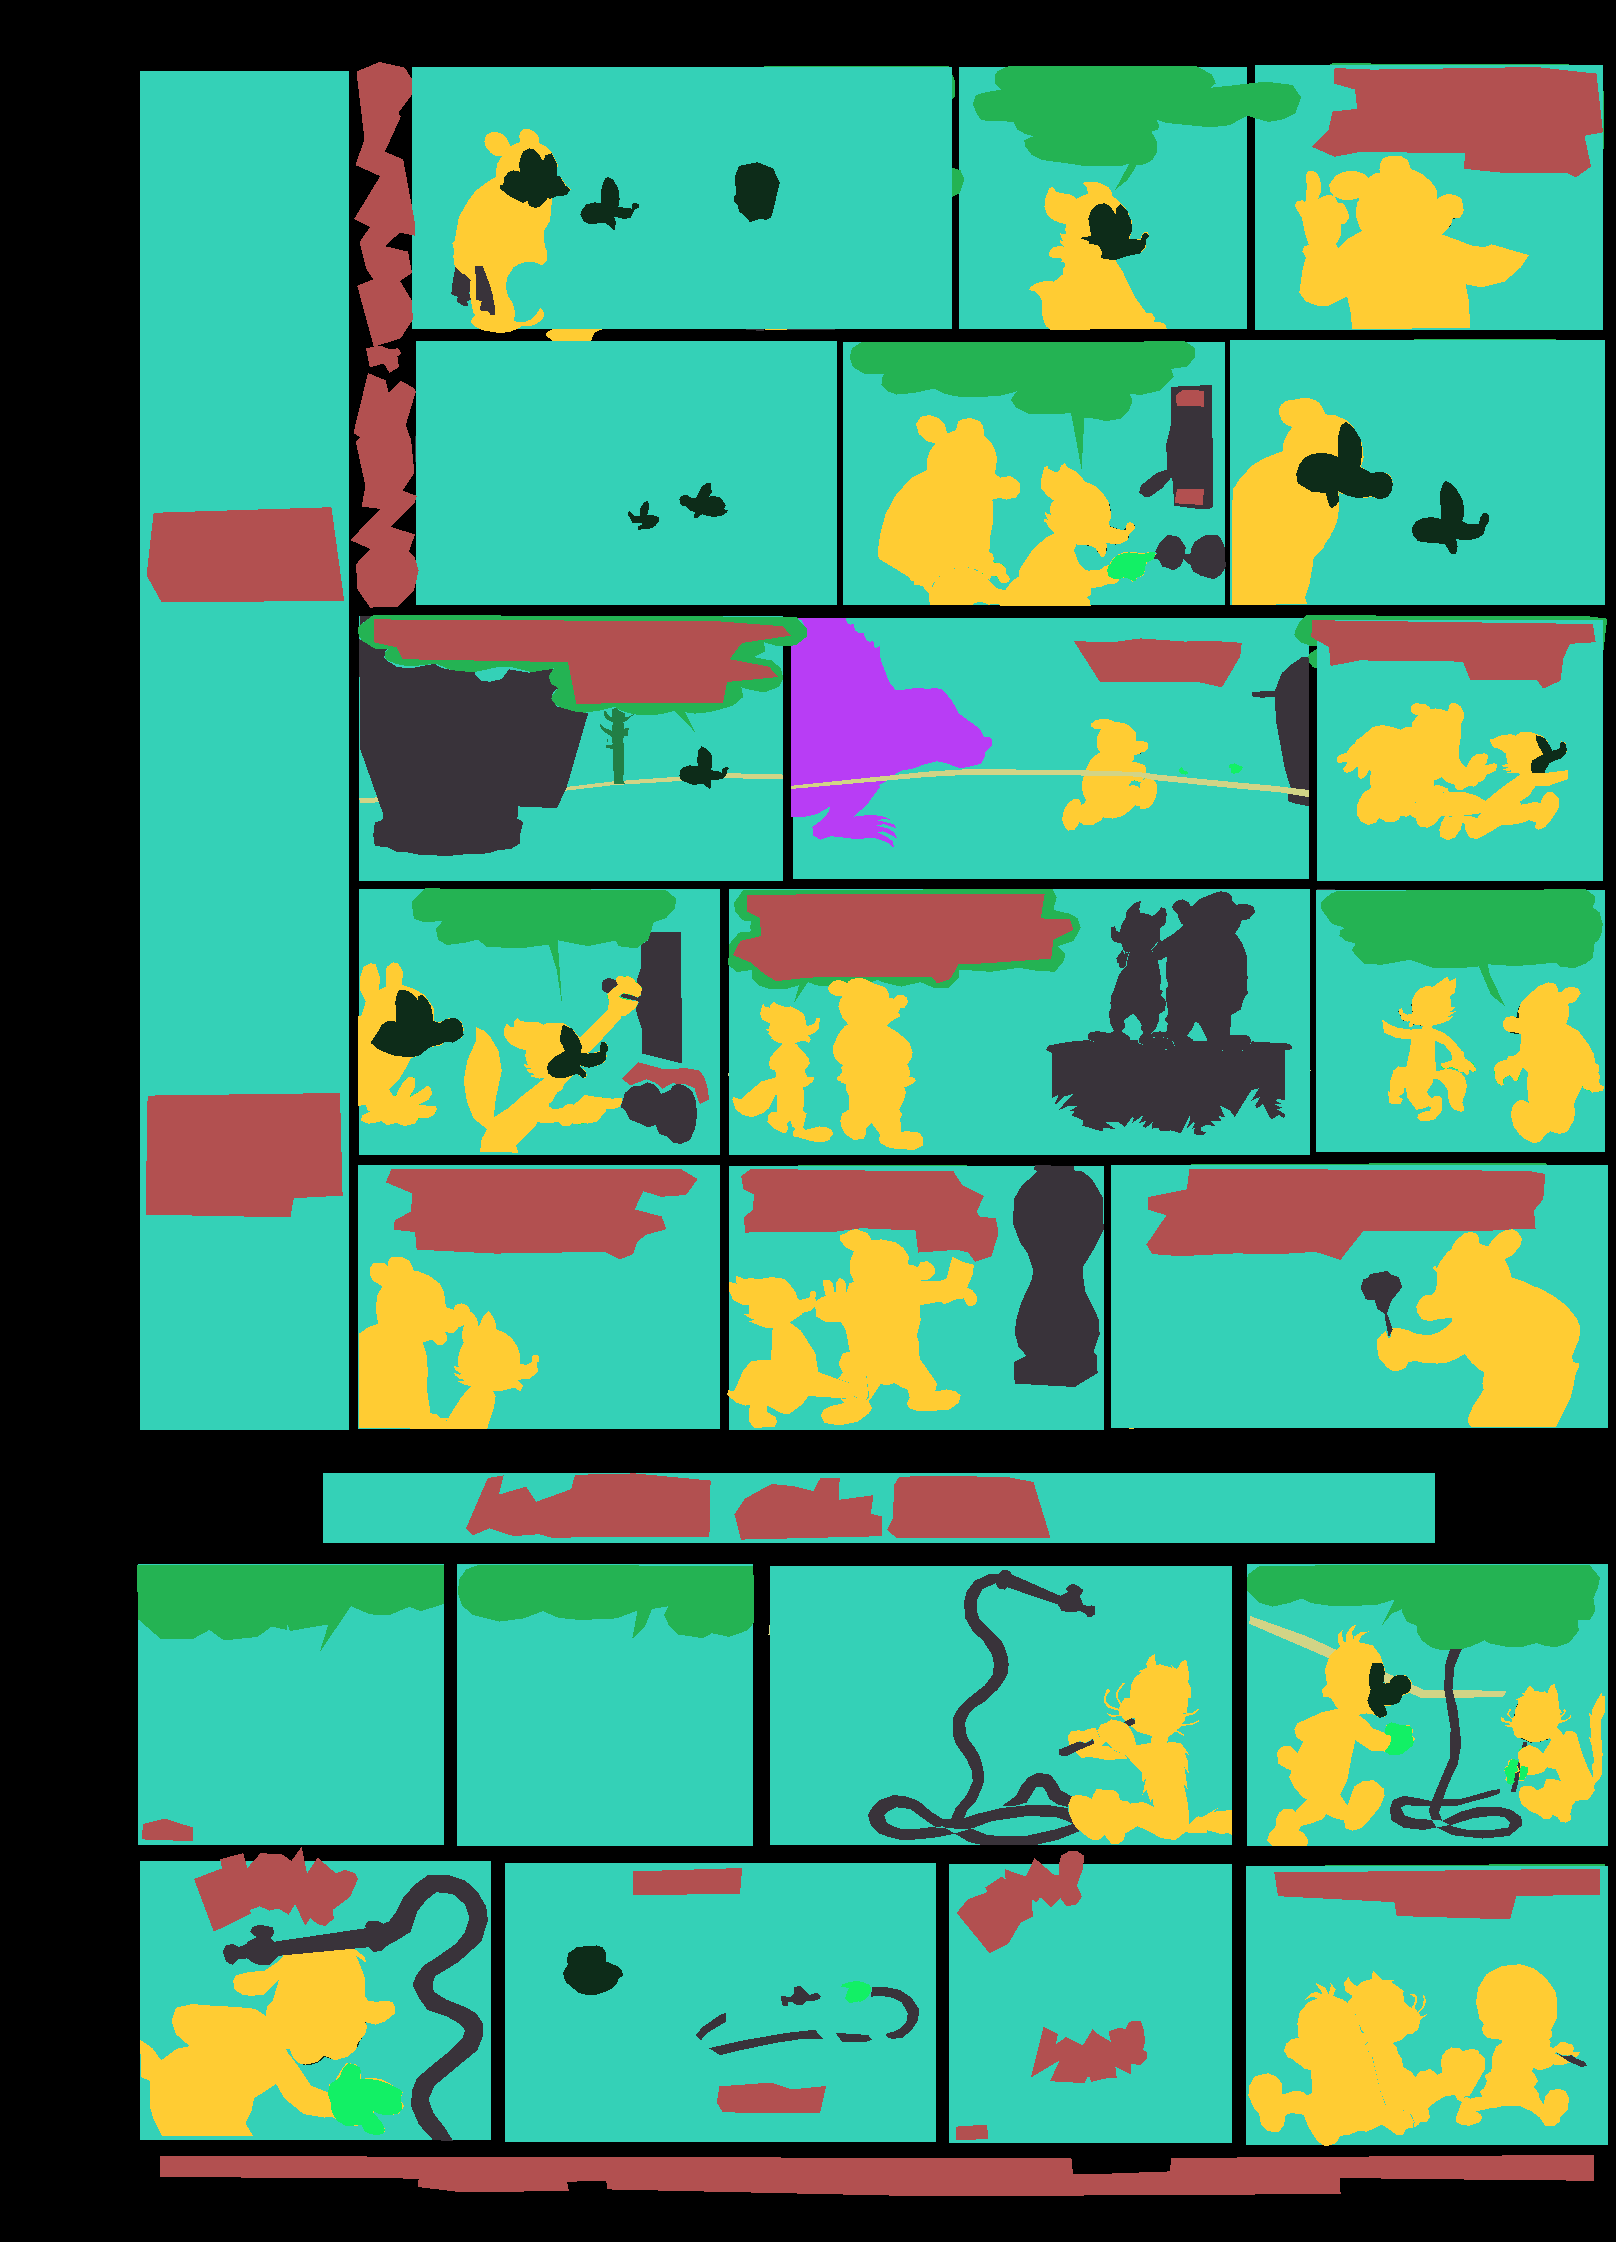

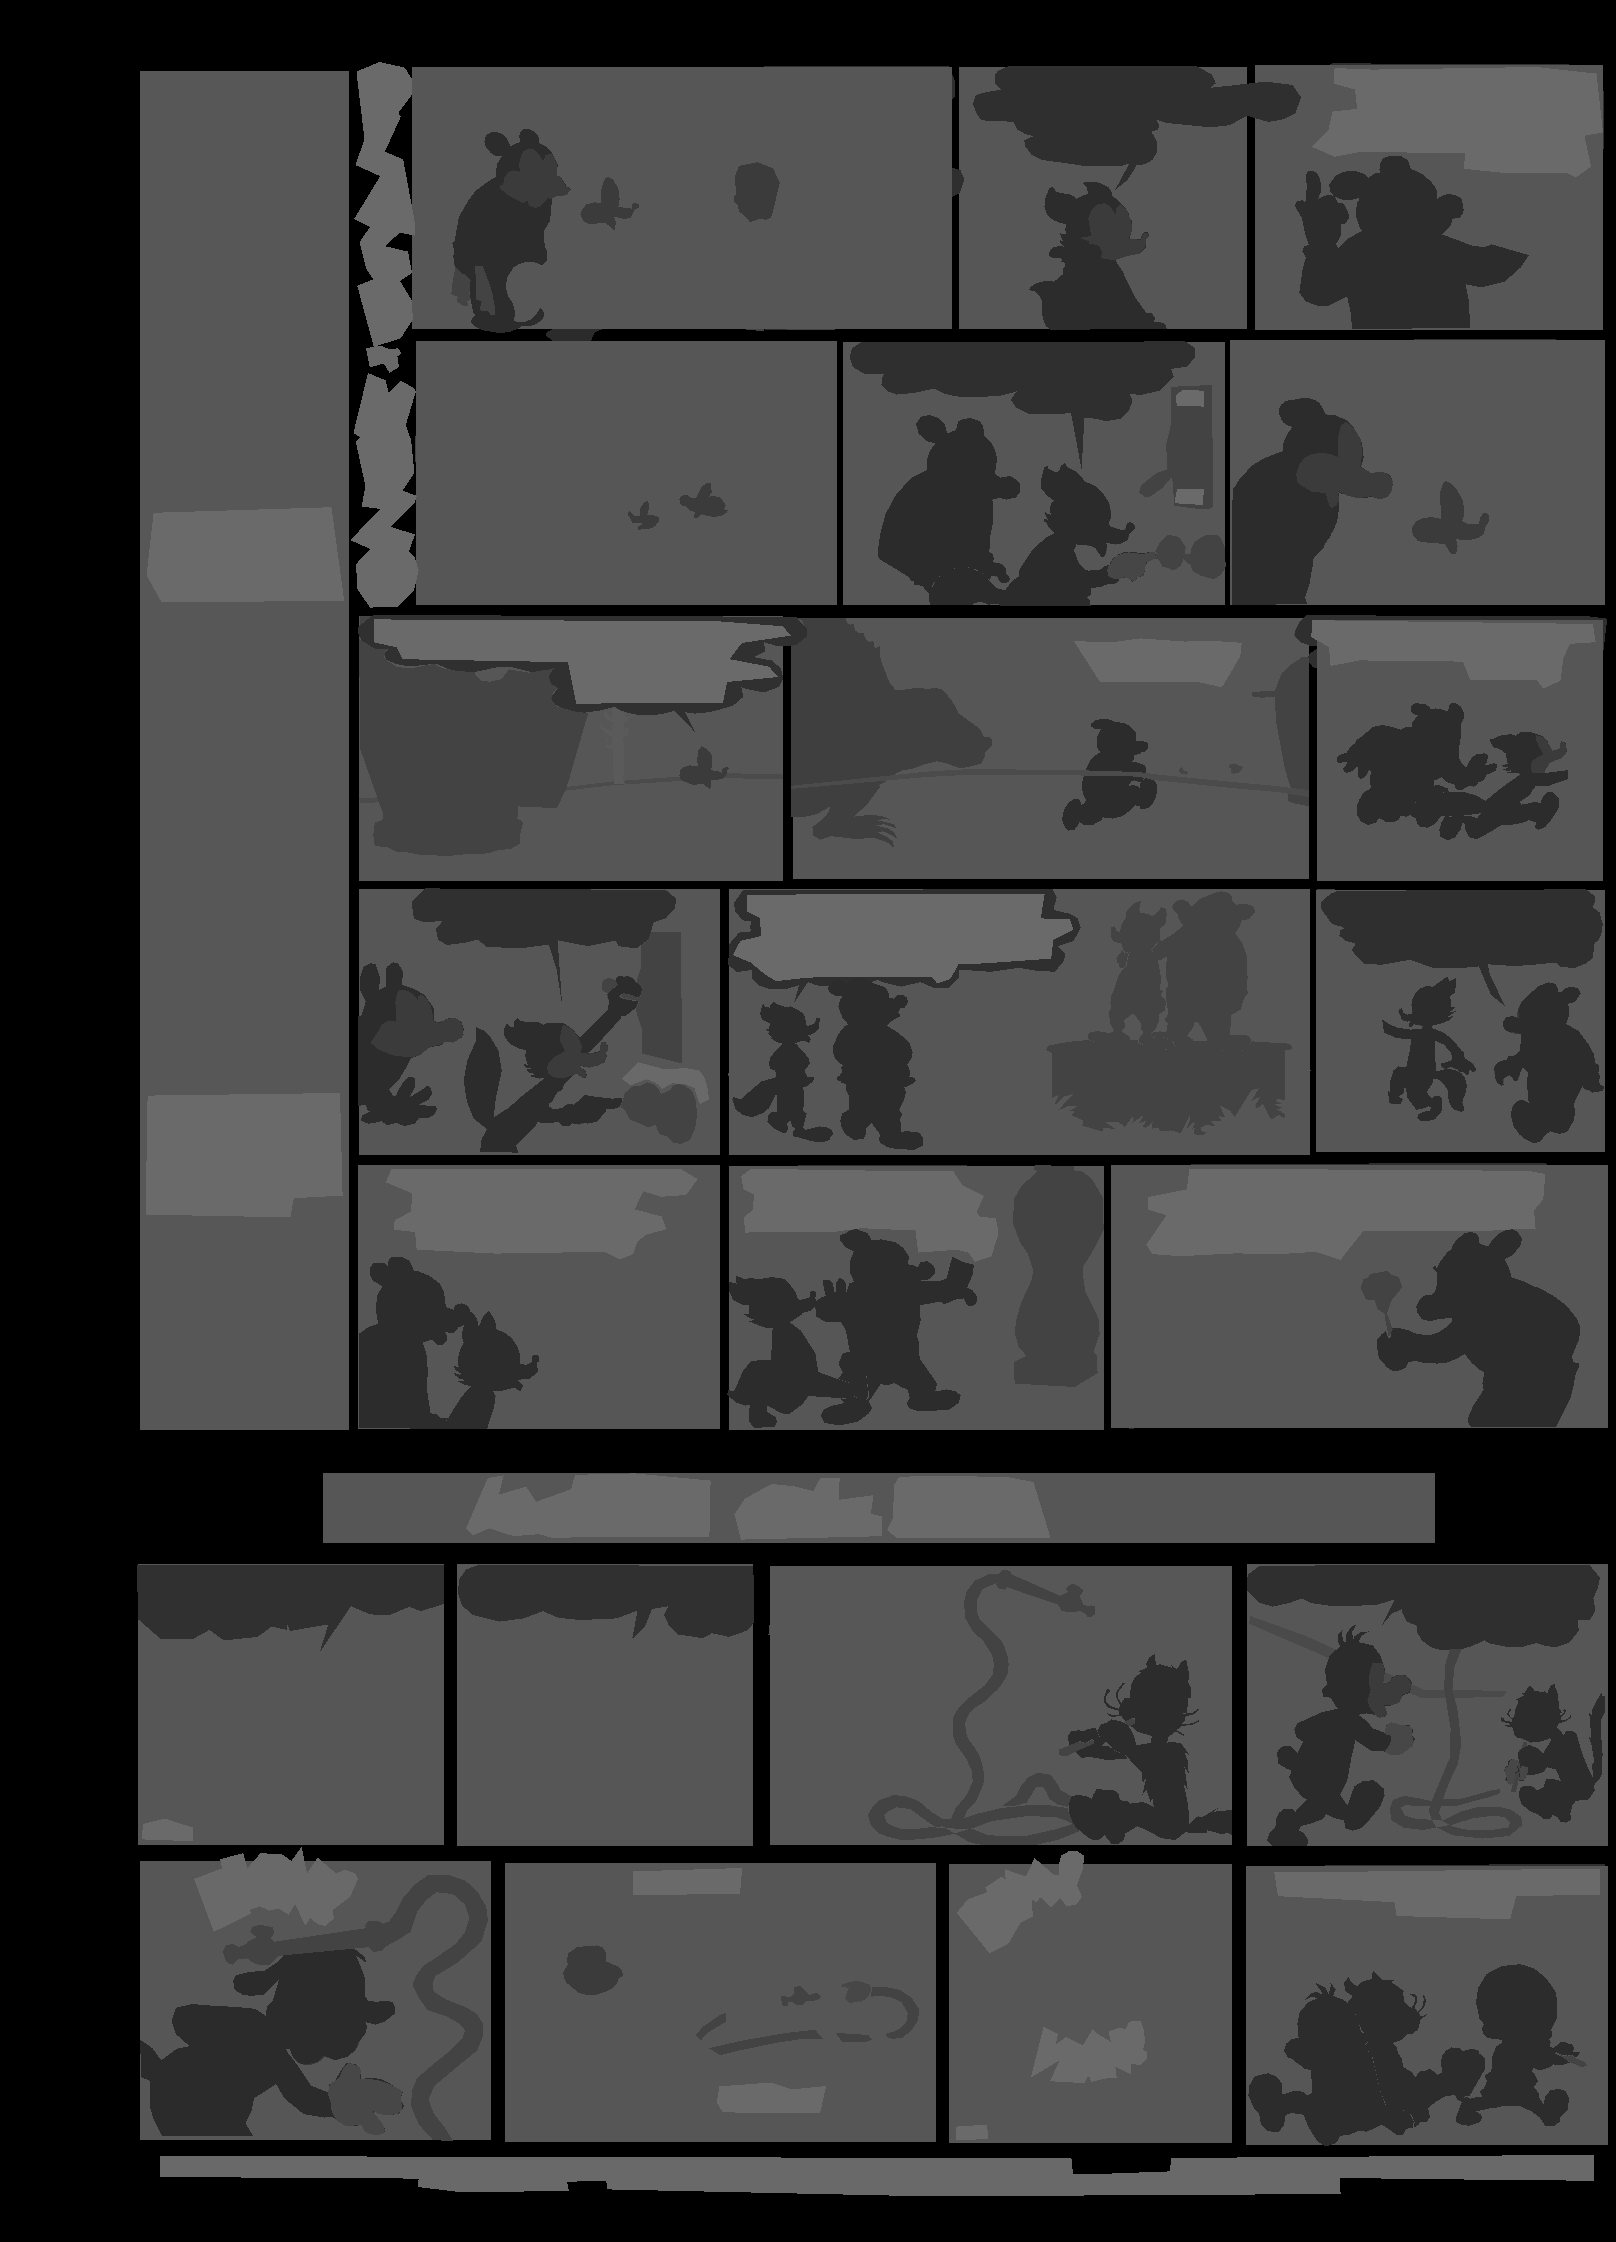

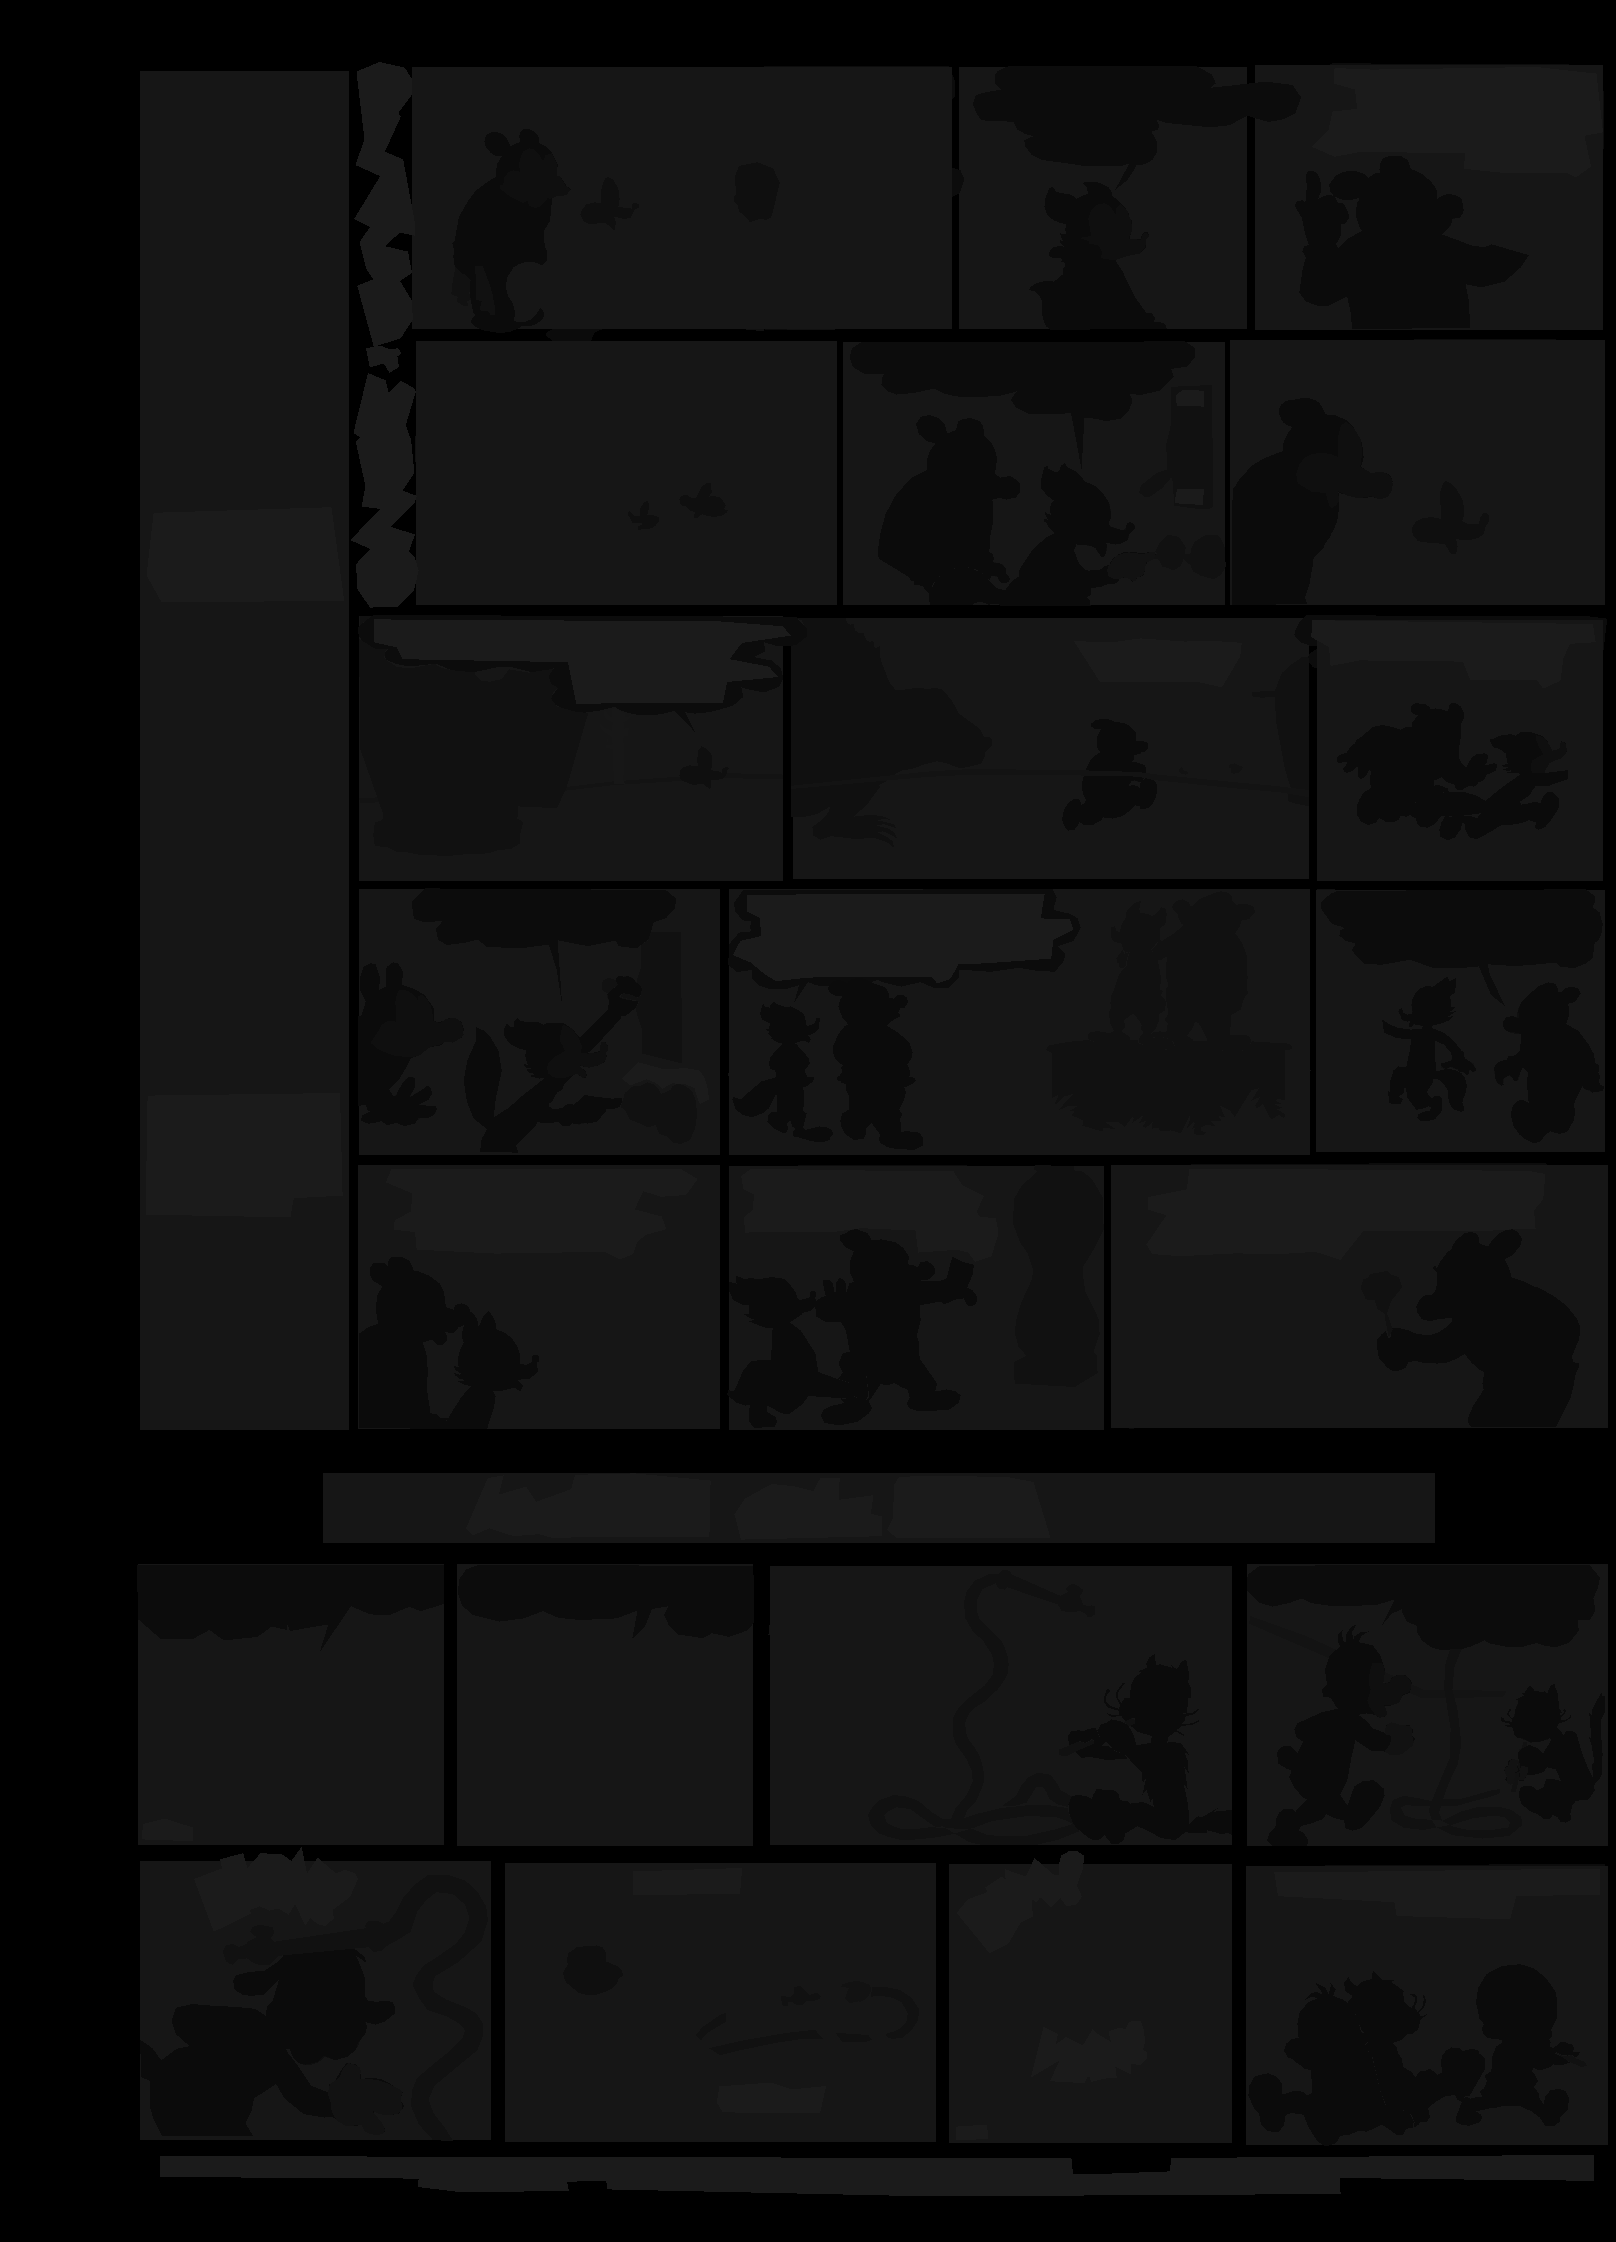

In [3]:
sinergia_gt_fine = os.path.join(sinergia_coco_dir, "gtFine/default")
instance_sample = os.path.join(sinergia_gt_fine, "placid", "Vaillant_0518_1955_04_17-16_gtFine_instanceIds.png")
color_sample = os.path.join(sinergia_gt_fine, "placid", "Vaillant_0518_1955_04_17-16_gtFine_color.png")
label_sample = os.path.join(sinergia_gt_fine, "placid", "Vaillant_0518_1955_04_17-16_gtFine_labelIds.png")

display(dis_image(color_sample))
display(dis_image(instance_sample))
display(dis_image(label_sample))

In [4]:
from PIL import Image
import numpy as np


np.unique(np.array(Image.open(instance_sample)))

array([    0, 11070, 11080, 11087, 11089, 11130, 11133, 11153, 11188,
       11234, 11237, 11243, 11247, 11250, 11251, 11252, 11256, 11258,
       11259, 11260, 11261, 11262, 11265, 11266, 11271, 11274, 11279,
       11290, 11291, 11292, 11293, 12001, 12016, 12049, 12103, 12106,
       12111, 12123, 12140, 12146, 12186, 12187, 12201, 12216, 12218,
       12220, 12281, 15064, 15084, 15099, 15148, 15150, 15169, 15241,
       15245, 15248, 15254, 15255, 15263, 15268, 15269, 15270, 15273,
       15275, 15276, 15278, 15283, 15286, 16124, 17011, 17057, 17058,
       17061, 17086, 17091, 17096, 17152, 17244, 17249, 17253, 17257,
       17264, 17267, 17294, 17295, 17296, 17297, 17298, 17299, 17300,
       18105, 18107, 18108, 18115, 18117, 18120, 18121, 18126, 18145,
       18149, 18151, 18185, 18235, 18238, 18240, 18301, 19006, 19047,
       19139, 19226, 19232, 22014, 22018, 22031, 22034, 22042, 22082,
       22094, 22176, 22177, 22178, 22179, 22181, 22182, 22183, 22189,
       22194, 22199,

In [11]:
def extract_categories(label_colors_file):
    class_id2color = {}
    int2category = {}
    with open(label_colors_file, 'r') as f:
        lines = f.readlines()
        for line_num, line in enumerate(lines):
            class_id = line_num + 1
            line = line.strip().split()
            color = line[:3]
            class_id2color[class_id] = color
            int2category[class_id] = ' '.join(line[3:])
    return class_id2color, int2category

In [12]:
# python imports
from __future__ import print_function, absolute_import, division, unicode_literals
import os
import glob
import sys
import argparse
import json
import numpy as np

# Image processing
from PIL import Image


class Convert2COCO:
    def __init__(self, root, label_colors_file, set_names, output_folder=None):
        self.root = root
        self.label_colors_file = label_colors_file
        self.output_folder = root if output_folder is None else output_folder
        self.set_names = set_names
        self.categories = []
        self.images = []
        self.annotations = []
        self.class_id2color = {}
        self.int2category = {}
        self.stuff_classes = ["Background", "Horizon"]
    
    def extract_categories(self):
        self.class_id2color, self.int2category = extract_categories(label_colors_file)
        for class_id, category in self.int2category.items():
            self.categories.append({
                'id': int(class_id),
                'name': category,
                'color': self.class_id2color[class_id],
                'isthing': 0 if category in self.stuff_classes else 1
            })
    
    def progress_files(self, set_name, files, panoptic_folder):
        image_id = 0
        for progress, f in enumerate(files):
            original_format = np.array(Image.open(f))
            file_name = os.path.basename(f)
            image_name = file_name.replace("_gtFine_instanceIds.png", "")
            output_file_name = file_name.replace("_instanceIds.png", "_panoptic.png")
            # image entry, id for image is its filename without extension
            self.images.append({
                "id": image_id,
                "width": int(original_format.shape[1]),
                "height": int(original_format.shape[0]),
                "file_name": f.replace("_gtFine_instanceIds", "").replace("gtFine", "images")
            })

            pan_format = np.zeros(
                (original_format.shape[0], original_format.shape[1], 3), dtype=np.uint8
            )

            segment_ids = np.unique(original_format)
            seg_info = []
            for segment_id in segment_ids:
                if segment_id == 0:
                    continue
                if segment_id < 1000:
                    semantic_id = segment_id
                    is_crowd = 1
                else:
                    semantic_id = segment_id // 1000
                    is_crowd = 0

                mask = original_format == segment_id
                pan_format[mask] = self.class_id2color[semantic_id]

                area = np.sum(mask) # segment area computation

                # bbox computation for a segment
                hor = np.sum(mask, axis=0)
                hor_idx = np.nonzero(hor)[0]
                x = hor_idx[0]
                width = hor_idx[-1] - x + 1
                vert = np.sum(mask, axis=1)
                vert_idx = np.nonzero(vert)[0]
                y = vert_idx[0]
                height = vert_idx[-1] - y + 1
                bbox = [int(x), int(y), int(width), int(height)]

                seg_info.append({
                    "id": int(segment_id % 1000),
                    "category_id": int(semantic_id),
                    "area": int(area),
                    "bbox": bbox,
                    "iscrowd": is_crowd
                })

            self.annotations.append({
                'image_id': image_id,
                'file_name': os.path.join(panoptic_folder, output_file_name),
                "segments_info": seg_info
            })
            image_id += 1

            Image.fromarray(pan_format).save(os.path.join(panoptic_folder, output_file_name))

            print("\rProgress: {:>3.2f} %".format((progress + 1) * 100 / len(files)), end=' ')
            sys.stdout.flush()
    
    def save_json(self, out_file):
        print("\nSaving the json file {}".format(out_file))
        content = {
            'images': self.images,
            'annotations': self.annotations,
            'categories': self.categories
        }
        with open(out_file, 'w') as f:
            json.dump(content, f, sort_keys=True, indent=4)


    def convert(self):
        gt_fine_path = os.path.join(self.root, "gtFine")
        self.extract_categories()

        for set_name in self.set_names:
            # how to search for all ground truth
            search_file = os.path.join(gt_fine_path, set_name, "*", "*_instanceIds.png")
            # search files
            files = glob.glob(search_file)
            files.sort()

            # quit if we did not find anything
            if not files:
                print(
                    "Did not find any files for {} set using matching pattern {}. Please consult the README.".format(set_name, search_file)
                )
            # a bit verbose
            print("Converting {} annotation files for {} set.".format(len(files), set_name))

            output_base = "coco_panoptic_new"
            out_file = os.path.join(self.output_folder, "{}.json".format(output_base))
            print("Json file with the annotations in panoptic format will be saved in {}".format(out_file))
            panoptic_folder = os.path.join(self.output_folder, output_base)
            if not os.path.isdir(panoptic_folder):
                print("Creating folder {} for panoptic segmentation PNGs".format(panoptic_folder))
                os.mkdir(panoptic_folder)
            print("Corresponding segmentations in .png format will be saved in {}".format(panoptic_folder))

            self.progress_files(set_name, files, panoptic_folder)
            self.save_json(out_file)

In [13]:
Convert2COCO(
    root=sinergia_coco_dir,
    label_colors_file=label_colors_file,
    set_names=["default"]
).convert()

Converting 243 annotation files for default set.
Json file with the annotations in panoptic format will be saved in /sinergia/shabanza/datasets/sinergia/coco_panoptic_new.json
Corresponding segmentations in .png format will be saved in /sinergia/shabanza/datasets/sinergia/coco_panoptic_new
Progress: 100.00 % 
Saving the json file /sinergia/shabanza/datasets/sinergia/coco_panoptic_new.json


In [14]:
coco_panoptic_json = os.path.join(sinergia_coco_dir, "coco_panoptic_new.json")
coco_panoptic_folder = os.path.join(sinergia_coco_dir, "coco_panoptic_new")

In [15]:
coco_panoptic_json

'/sinergia/shabanza/datasets/sinergia/coco_panoptic_new.json'

In [16]:
import json

f = open(coco_panoptic_json, 'r')
coco_panoptic = json.load(f)
f.close()

In [17]:
coco_panoptic['images']

[{'file_name': '/sinergia/shabanza/datasets/sinergia/images/default/placid/Vaillant_0451_1954_01_03-01.png',
  'height': 2304,
  'id': 0,
  'width': 1615},
 {'file_name': '/sinergia/shabanza/datasets/sinergia/images/default/placid/Vaillant_0452_1954_01_10-01.png',
  'height': 2299,
  'id': 1,
  'width': 1617},
 {'file_name': '/sinergia/shabanza/datasets/sinergia/images/default/placid/Vaillant_0453_1954_01_17-01.png',
  'height': 2302,
  'id': 2,
  'width': 1621},
 {'file_name': '/sinergia/shabanza/datasets/sinergia/images/default/placid/Vaillant_0454_1954_01_24-01.png',
  'height': 2303,
  'id': 3,
  'width': 1604},
 {'file_name': '/sinergia/shabanza/datasets/sinergia/images/default/placid/Vaillant_0455_1954_01_31-01.png',
  'height': 2289,
  'id': 4,
  'width': 1637},
 {'file_name': '/sinergia/shabanza/datasets/sinergia/images/default/placid/Vaillant_0456_1954_02_07-01.png',
  'height': 2285,
  'id': 5,
  'width': 1605},
 {'file_name': '/sinergia/shabanza/datasets/sinergia/images/defa

## Convert to Panoptic to Detection


In [19]:
!git clone https://github.com/cocodataset/panopticapi.git

Cloning into 'panopticapi'...
remote: Enumerating objects: 133, done.
remote: Counting objects: 100% (46/46), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 133 (delta 37), reused 33 (delta 33), pack-reused 87
Receiving objects: 100% (133/133), 653.40 KiB | 119.00 KiB/s, done.
Resolving deltas: 100% (73/73), done.


In [21]:
%pip install git+https://github.com/cocodataset/panopticapi.git

Defaulting to user installation because normal site-packages is not writeable
  Cloning https://github.com/cocodataset/panopticapi.git to /tmp/pip-req-build-cxei8x_h
  Running command git clone -q https://github.com/cocodataset/panopticapi.git /tmp/pip-req-build-cxei8x_h
  Created wheel for panopticapi: filename=panopticapi-0.1-py3-none-any.whl size=8318 sha256=430280879997901c6ca9db4a63bbef6ce07bfa49d9736582c172505238617e77
  Stored in directory: /tmp/pip-ephem-wheel-cache-pxrz8az1/wheels/b3/fc/e3/2463e5db55087b06e9c3bb117af1a63a080d1ec4c33291cec9
Successfully built panopticapi


In [18]:
%pip install pycocotools

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [8]:
#!/usr/bin/env python
'''
This script converts panoptic COCO format to detection COCO format. More
information about the formats can be found here:
http://cocodataset.org/#format-data. All segments will be stored in RLE format.

Additional option:
- using option '--things_only' the script can discard all stuff
segments, saving segments of things classes only.
'''
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
from __future__ import unicode_literals
import os, sys
import argparse
import numpy as np
import json
import time
import multiprocessing

import PIL.Image as Image

from panopticapi.utils import get_traceback, rgb2id, save_json

try:
    # set up path for pycocotools
    # sys.path.append('./cocoapi-master/PythonAPI/')
    from pycocotools import mask as COCOmask
except Exception:
    raise Exception("Please install pycocotools module from https://github.com/cocodataset/cocoapi")

@get_traceback
def convert_panoptic_to_detection_coco_format_single_core(
    proc_id, annotations_set, categories, segmentations_folder, things_only
):
    annotations_detection = []
    for working_idx, annotation in enumerate(annotations_set):
        if working_idx % 100 == 0:
            print('Core: {}, {} from {} images processed'.format(proc_id,
                                                                 working_idx,
                                                                 len(annotations_set)))

        file_name = '{}.png'.format(annotation['file_name'].rsplit('.')[0])
        try:
            pan_format = np.array(
                Image.open(os.path.join(segmentations_folder, file_name)), dtype=np.uint32
            )
        except IOError:
            raise KeyError('no prediction png file for id: {}'.format(annotation['image_id']))
        pan = rgb2id(pan_format)

        for segm_info in annotation['segments_info']:
            if things_only and categories[segm_info['category_id']]['isthing'] != 1:
                continue
            mask = (pan == segm_info['id']).astype(np.uint8)
            mask = np.expand_dims(mask, axis=2)
            segm_info.pop('id')
            segm_info['image_id'] = annotation['image_id']
            rle = COCOmask.encode(np.asfortranarray(mask))[0]
            rle['counts'] = rle['counts'].decode('utf8')
            segm_info['segmentation'] = rle
            annotations_detection.append(segm_info)

    print('Core: {}, all {} images processed'.format(proc_id, len(annotations_set)))
    return annotations_detection


def convert_panoptic_to_detection_coco_format(input_json_file,
                                              segmentations_folder,
                                              output_json_file,
                                              label_colors_file,
                                              things_only):
    start_time = time.time()

    if segmentations_folder is None:
        segmentations_folder = input_json_file.rsplit('.', 1)[0]

    print("CONVERTING...")
    print("COCO panoptic format:")
    print("\tSegmentation folder: {}".format(segmentations_folder))
    print("\tJSON file: {}".format(input_json_file))
    print("TO")
    print("COCO detection format")
    print("\tJSON file: {}".format(output_json_file))
    if things_only:
        print("Saving only segments of things classes.")
    print('\n')

    print("Reading annotation information from {}".format(input_json_file))
    with open(input_json_file, 'r') as f:
        d_coco = json.load(f)
    annotations_panoptic = d_coco['annotations']

    categories, _ = extract_categories(label_colors_file)

    cpu_num = multiprocessing.cpu_count()
    annotations_split = np.array_split(annotations_panoptic, cpu_num)
    print("Number of cores: {}, images per core: {}".format(cpu_num, len(annotations_split[0])))
    workers = multiprocessing.Pool(processes=cpu_num)
    processes = []
    for proc_id, annotations_set in enumerate(annotations_split):
        p = workers.apply_async(convert_panoptic_to_detection_coco_format_single_core,
                                (proc_id, annotations_set, categories, segmentations_folder, things_only))
        processes.append(p)
    annotations_coco_detection = []
    for p in processes:
        annotations_coco_detection.extend(p.get())
    for idx, ann in enumerate(annotations_coco_detection):
        ann['id'] = idx

    d_coco['annotations'] = annotations_coco_detection
    categories_coco_detection = []
    for category in d_coco['categories']:
        if things_only and category['isthing'] != 1:
            continue
        category.pop('isthing')
        category.pop('color')
        categories_coco_detection.append(category)
    d_coco['categories'] = categories_coco_detection
    save_json(d_coco, output_json_file)

    t_delta = time.time() - start_time
    print("Time elapsed: {:0.2f} seconds".format(t_delta))

In [18]:
coco_detection_json = coco_panoptic_json.replace("panoptic", "detection")
coco_detection_json

'/sinergia/shabanza/datasets/sinergia/coco_detection_new.json'

In [19]:
convert_panoptic_to_detection_coco_format(
    input_json_file=coco_panoptic_json,
    segmentations_folder=coco_panoptic_folder,
    output_json_file=coco_detection_json,
    label_colors_file=label_colors_file,
    things_only=False
)

CONVERTING...
COCO panoptic format:
	Segmentation folder: /sinergia/shabanza/datasets/sinergia/coco_panoptic_new
	JSON file: /sinergia/shabanza/datasets/sinergia/coco_panoptic_new.json
TO
COCO detection format
	JSON file: /sinergia/shabanza/datasets/sinergia/coco_detection_new.json


Reading annotation information from /sinergia/shabanza/datasets/sinergia/coco_panoptic_new.json
Number of cores: 64, images per core: 4


Core: 1, 0 from 4 images processedCore: 0, 0 from 4 images processedCore: 4, 0 from 4 images processedCore: 2, 0 from 4 images processedCore: 5, 0 from 4 images processedCore: 3, 0 from 4 images processedCore: 6, 0 from 4 images processed

Core: 7, 0 from 4 images processed
Core: 10, 0 from 4 images processedCore: 8, 0 from 4 images processed
Core: 9, 0 from 4 images processed
Core: 11, 0 from 4 images processed

Core: 12, 0 from 4 images processed






Core: 13, 0 from 4 images processedCore: 14, 0 from 4 images processedCore: 15, 0 from 4 images processedCore: 16, 0 from 4 images processedCore: 17, 0 from 4 images processedCore: 19, 0 from 4 images processedCore: 18, 0 from 4 images processedCore: 20, 0 from 4 images processedCore: 24, 0 from 4 images processedCore: 25, 0 from 4 images processed





Core: 26, 0 from 4 images processedCore: 23, 0 from 4 images processedCore: 27, 0 from 4 images processed


Core: 29, 0 from 4 images processed
Core: 28, 0 from 4 images processed


Cor

In [20]:
import json

f = open(coco_detection_json, 'r')
coco_detection = json.load(f)
f.close()

In [21]:
coco_detection['annotations']

[{'area': 14822,
  'bbox': [271, 778, 164, 205],
  'category_id': 6,
  'iscrowd': 0,
  'image_id': 0,
  'segmentation': {'size': [2304, 1615], 'counts': 'Phaa3'},
  'id': 0},
 {'area': 75648,
  'bbox': [398, 1976, 378, 228],
  'category_id': 6,
  'iscrowd': 0,
  'image_id': 0,
  'segmentation': {'size': [2304, 1615], 'counts': 'Phaa3'},
  'id': 1},
 {'area': 28,
  'bbox': [292, 2204, 28, 1],
  'category_id': 11,
  'iscrowd': 0,
  'image_id': 0,
  'segmentation': {'size': [2304, 1615], 'counts': 'Phaa3'},
  'id': 2},
 {'area': 27446,
  'bbox': [1211, 1916, 262, 282],
  'category_id': 11,
  'iscrowd': 0,
  'image_id': 0,
  'segmentation': {'size': [2304, 1615], 'counts': 'Phaa3'},
  'id': 3},
 {'area': 2338,
  'bbox': [597, 1319, 77, 67],
  'category_id': 11,
  'iscrowd': 0,
  'image_id': 0,
  'segmentation': {'size': [2304, 1615], 'counts': 'Phaa3'},
  'id': 4},
 {'area': 13051,
  'bbox': [765, 1150, 123, 237],
  'category_id': 11,
  'iscrowd': 0,
  'image_id': 0,
  'segmentation': {'si

## Register your dataset

You can do this by creating a new Python file and defining a function that returns your dataset in the COCO format. You need to use the register_coco_instances function to register your dataset. Here is an example:

- [link](https://detectron2.readthedocs.io/en/latest/tutorials/datasets.html)

In [22]:
from detectron2.data import MetadataCatalog, DatasetCatalog
from detectron2.data.datasets.coco import load_coco_json

In [23]:
dataset_name = "coco_sinergia"

In [24]:
def sinergia_dataset_function():
    return load_coco_json(
        "/sinergia/shabanza/datasets/sinergia/coco_detection_default.json", sinergia_img_dir, dataset_name
    )

DatasetCatalog.register(dataset_name, sinergia_dataset_function)

In [25]:
dataset_dicts = DatasetCatalog.get(dataset_name)
metadata = MetadataCatalog.get(dataset_name)

### Visualize Images from Dataste

In [26]:
import random
import cv2
import matplotlib.pyplot as plt

In [27]:
sample = random.choice(dataset_dicts)
image = cv2.imread(sample["file_name"])

In [28]:
sample

{'file_name': '/sinergia/shabanza/datasets/sinergia/gtFine/default/placid/Vaillant_0631_1957_06_16-32_gtFine_instanceIds.png',
 'height': 2227,
 'width': 1571,
 'image_id': 129,
 'annotations': [{'iscrowd': 0,
   'bbox': [695, 1629, 358, 1],
   'category_id': 2,
   'segmentation': {'size': [2227, 1571],
    'counts': '0gdm61k`TI3M3M3M3M3M3M3M3M3M3M3M3M3M3M3M4L3MU1kN00000000000001Oi^N^M]o0b2YPOhMgo0X2XPOiMho0W2]eNiMl30TP1@TlNg2DWNn3B\\G_Oee0_;k^OQE=Y2H[Nj3]OaFl:X<2nH`Eb0j1M`Nd3YOgFk:430Oh4PFf0Z13fNlMD>_OQLk:430O]4`Fl0j08kNYM1m0mNULk:430OY4iFk0a0=POPM5Q1eNYLj:530OU4RGj08b0VOgL7U1]N^Lj:530OP4\\Gj0Ng0[O^L;Y1TNcLj:530Ol3fGh0Dm0@VL>\\1lMhLj:530Oh3nGh0\\OQ1EmKb0`1cMmLj:530Od3UHi0UOT1KdKc0e1\\MQMj:530O`3[Hk0oNV1K`Kl0d1SMVMj:530O\\3bHl0hNY1K\\KU1c1jL[Mj:530OY3hHl0bN\\1KYKZ1d1eL]Mj:530OW3lHl0^N^1KUK`1f1_L_Mj:530OU3QIk0YNa1KSKd1f1[LaMj:530OS3UIk0UNc1KPKi1g1VLcMj:530OQ3ZIj0PNf1KnJm1g1RLeMj:530On2`Ij0jMi1KlJQ2g1nKgMj:530Ol2dIj0fMk1KjJU2g1jKiMj:530Oj2iIi0aMn1KgJZ2h1eKkMj:530Oh2nIh0\\MQ2KeJ^2h1aKmMj:

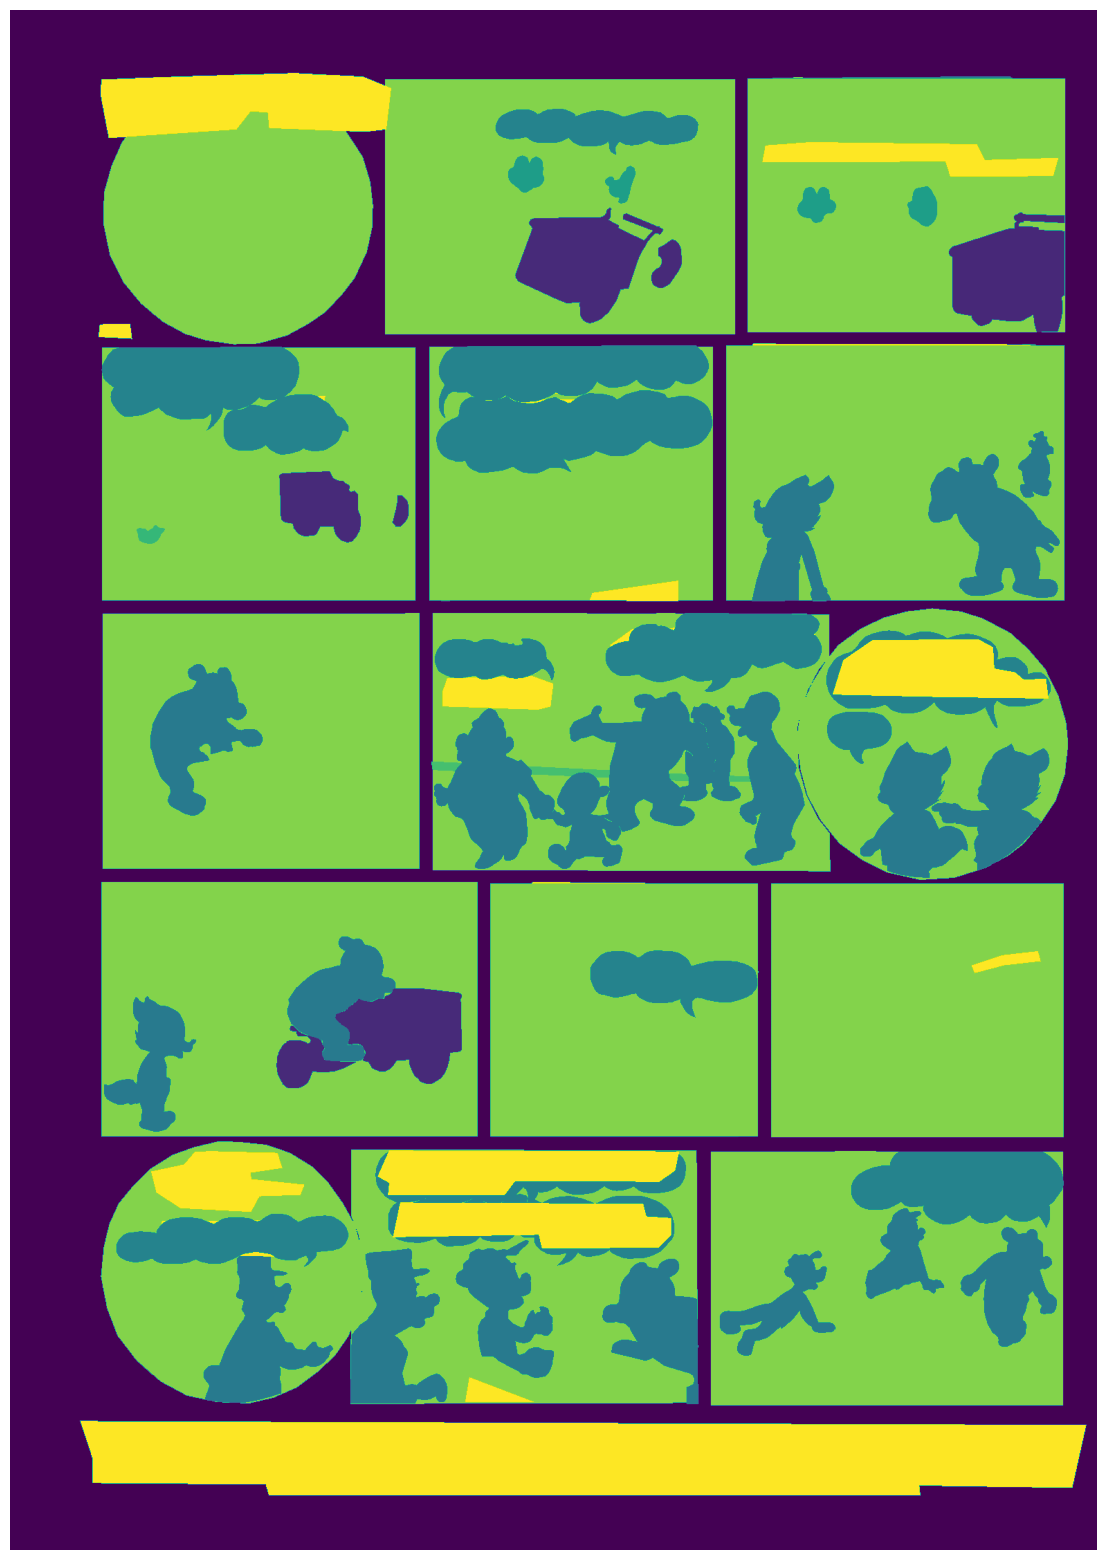

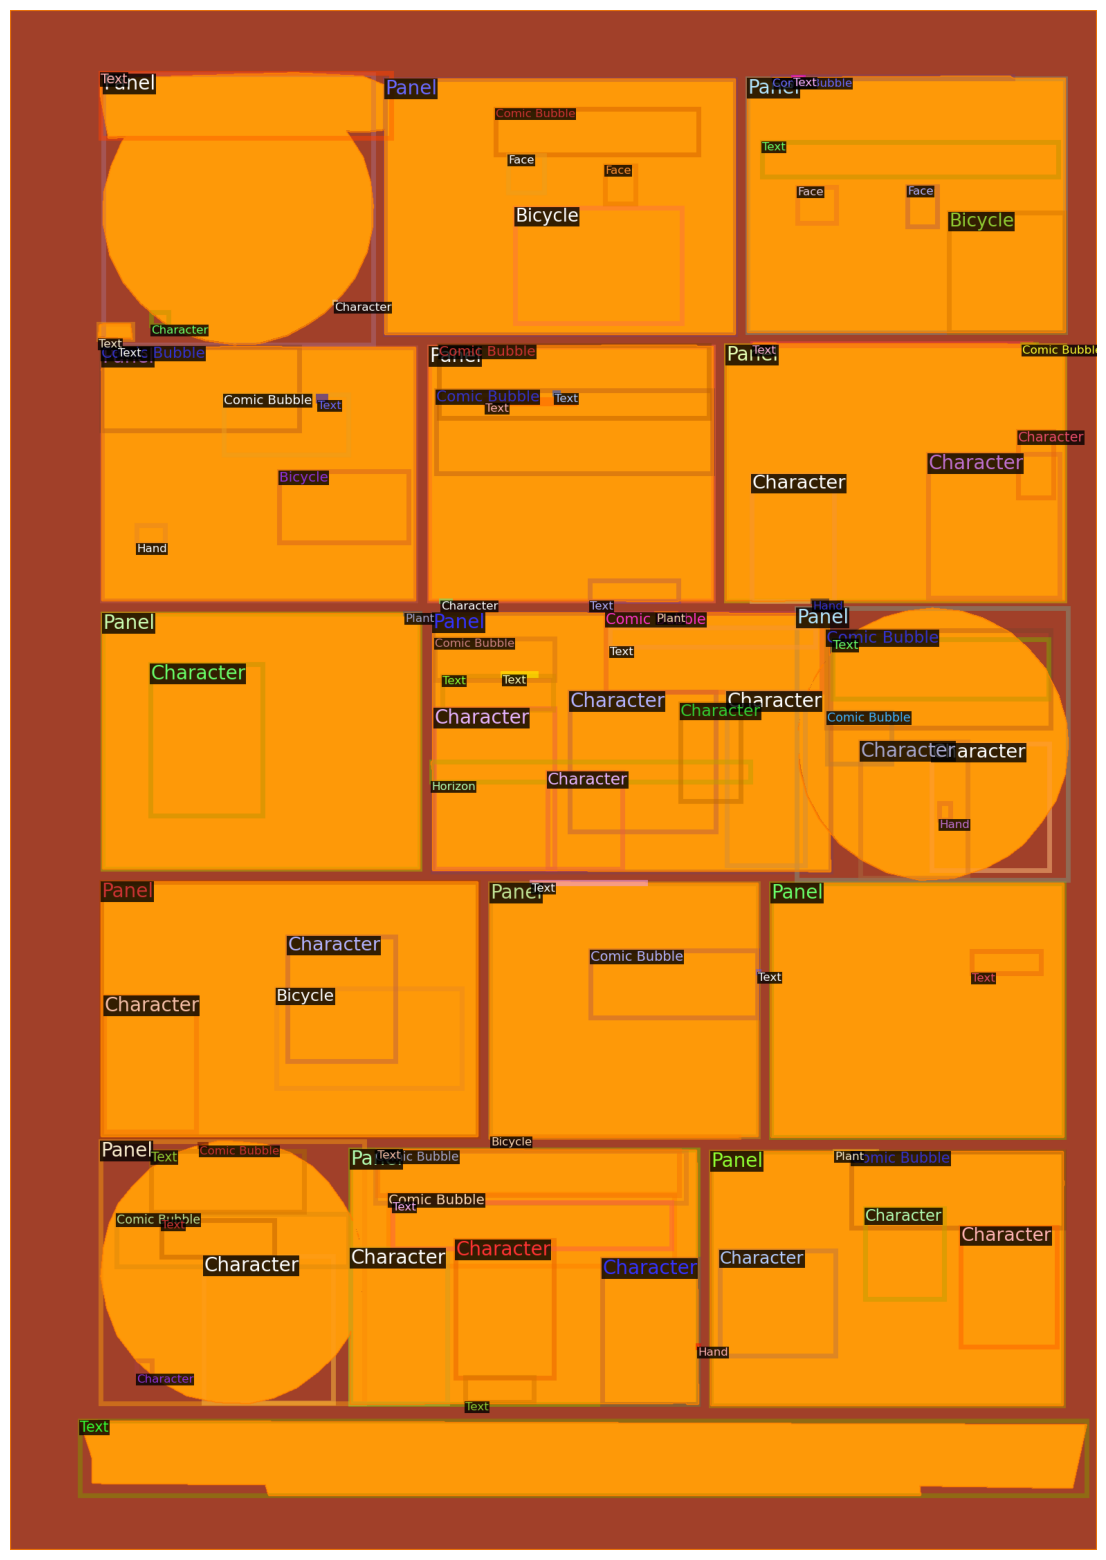

In [29]:
from detectron2.utils.visualizer import Visualizer

image = Image.open(sample["file_name"])
visualizer = Visualizer(image, metadata)
vis_img = visualizer.draw_dataset_dict(sample)
plt.figure(figsize=(20, 20))
plt.imshow(np.array(image))
plt.axis('off')
plt.show()
plt.figure(figsize=(20, 20))
plt.imshow(vis_img.get_image())
plt.axis('off')
plt.show()

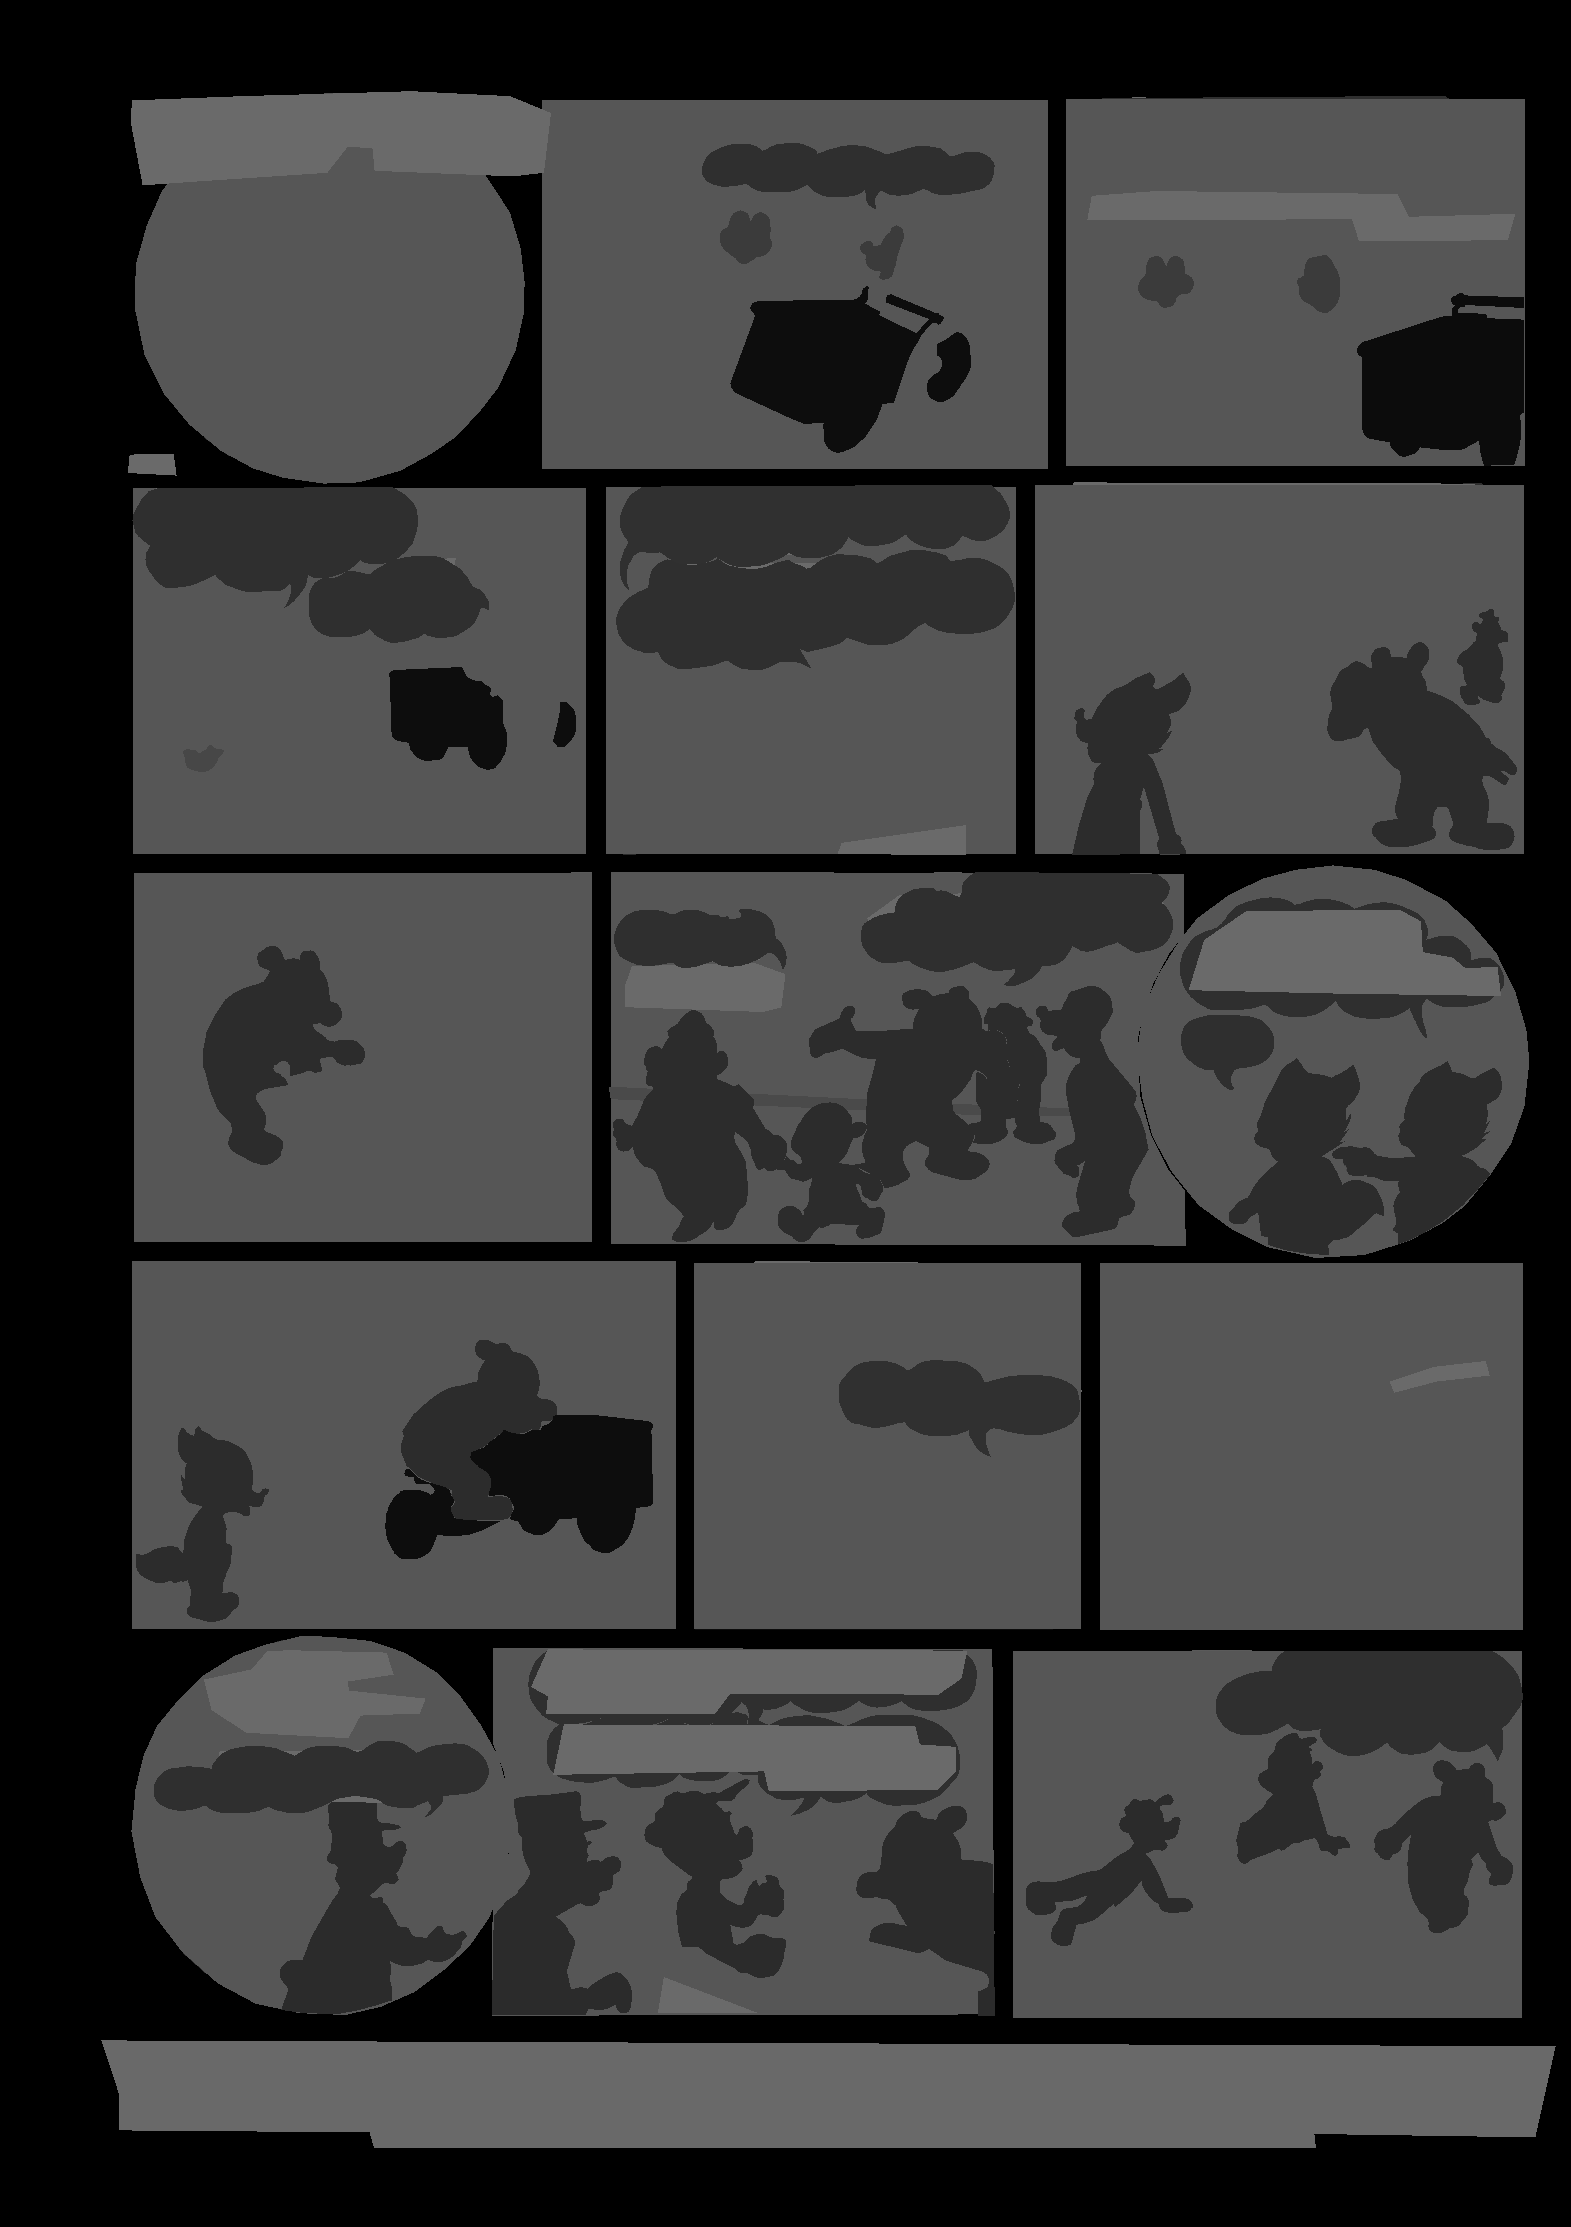

In [30]:
display(dis_image(sample["file_name"]))

In [75]:
image = np.array(Image.open(sample["file_name"]))
np.unique(image)

array([    0, 11051, 11065, 11068, 11069, 15016, 17005, 18018, 18019,
       20015, 20070, 20071, 22048, 22053, 22061, 22063, 22064, 23006,
       23013, 23031, 23032, 23036, 23037, 23038, 27050, 27055, 27062,
       27066], dtype=int32)

In [ ]:
from detectron2.utils.visualizer import Visualizer


def visualize_sample_anns(image, metadata):
    visualizer = Visualizer(image, metadata)
    annotations = sample["annotations"]

    # Draw the annotations on the image
    for annotation in annotations:
        bbox = annotation["bbox"]
        vis_img = visualizer.draw_box(bbox, edge_color='red', alpha=0.5)

        # Draw the polygons of the segmentation mask
        segment = annotation["segmentation"]
        if not isinstance(segment, dict):
            polygons = [segment[0]]
            for polygon in polygons:
                polygon = [(x, y) for x, y in zip(polygon[0::2], polygon[1::2])]
                polygon = [tuple(map(int, point)) for point in polygon]
                draw = ImageDraw.Draw(image)
                draw.polygon(polygon, outline='green', width=2)

    # Display the image
    image.show()